In [26]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [27]:
train_data = pd.read_csv('data\\kc_train.csv')
test_data = pd.read_csv('data\\kc_test.csv')
train_data.head()

,sell_date,sell_price,bedrooms_num,bathrooms_num,house_area,park_area,floors,score,structure_area,basement_area,bulid_year,fix_year,latitude,longitude
0,20150302,545000,3,2.25,1670,6240,1.0,8,1240,430,1974,0,47.6413,-122.113
1,20150211,785000,4,2.50,3300,10514,2.0,10,3300,0,1984,0,47.6323,-122.036
2,20150107,765000,3,3.25,3190,5283,2.0,9,3190,0,2007,0,47.5534,-122.002
3,20141103,720000,5,2.50,2900,9525,2.0,9,2900,0,1989,0,47.5442,-122.138
4,20140603,449500,5,2.75,2040,7488,1.0,7,1200,840,1969,0,47.7289,-122.172


In [28]:
train_data.describe()

,sell_date,sell_price,bedrooms_num,bathrooms_num,house_area,park_area,floors,score,structure_area,basement_area,bulid_year,fix_year,latitude,longitude
count,1.000000e+04,1.000000e+04,10000.000000,10000.0000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,2.014392e+07,5.428749e+05,3.367600,2.1168,2082.488400,1.535273e+04,1.502850,7.664800,1791.474900,291.013500,1971.204700,85.209700,47.560629,-122.215845
std,4.440706e+03,3.729258e+05,0.893169,0.7741,922.878916,4.577623e+04,0.543642,1.173873,829.449437,446.641339,29.322957,403.491421,0.138570,0.139739
min,2.014050e+07,7.500000e+04,0.000000,0.0000,390.000000,5.720000e+02,1.000000,3.000000,390.000000,0.000000,1900.000000,0.000000,47.159300,-122.519000
25%,2.014072e+07,3.225000e+05,3.000000,1.7500,1430.000000,5.023250e+03,1.000000,7.000000,1190.000000,0.000000,1951.750000,0.000000,47.471375,-122.329000
50%,2.014102e+07,4.507000e+05,3.000000,2.2500,1910.000000,7.590000e+03,1.500000,7.000000,1560.000000,0.000000,1975.000000,0.000000,47.572200,-122.234000
75%,2.015022e+07,6.450000e+05,4.000000,2.5000,2550.000000,1.071700e+04,2.000000,8.000000,2211.500000,560.000000,1997.000000,0.000000,47.678400,-122.127000
max,2.015053e+07,6.885000e+06,10.000000,7.7500,9890.000000,1.651359e+06,3.500000,13.000000,8860.000000,4820.000000,2015.000000,2015.000000,47.777600,-121.315000


In [29]:
import time 
def getYear(dt):
    dt = str(dt)
    t = time.strptime(dt, '%Y%m%d')
    return t.tm_year
def getMonth(dt):
    dt = str(dt)
    t = time.strptime(dt, '%Y%m%d')
    return t.tm_mon 
def getDay(dt):
    dt = str(dt)
    t = time.strptime(dt, '%Y%m%d')
    return t.tm_mday
def getWeek(dt):
    dt = str(dt)
    t = time.strptime(dt,'%Y%m%d')
    return t.tm_wday

In [30]:
train_data['year'] = train_data['sell_date'].apply(getYear)
train_data['month'] = train_data['sell_date'].apply(getMonth)
train_data['day'] = train_data['sell_date'].apply(getDay)
train_data['week'] = train_data['sell_date'].apply(getWeek) 

In [31]:
test_data['year'] = test_data['sell_date'].apply(getYear)
test_data['month'] = test_data['sell_date'].apply(getMonth)
test_data['day'] = test_data['sell_date'].apply(getDay)
test_data['week'] = test_data['sell_date'].apply(getWeek) 

In [32]:
train_data['bulid_age'] = train_data['year'] - train_data['bulid_year']
train_data['fix_age'] =  train_data['fix_year']
train_data.fix_age[train_data['fix_age']>0] =train_data.year[train_data['fix_age']>0]-train_data.fix_age[train_data['fix_age']>0]

test_data['bulid_year'] = test_data['year'] - test_data['bulid_year']
test_data['fix_age'] =  test_data['fix_year']
test_data.fix_age[test_data['fix_age']>0] =test_data.year[test_data['fix_age']>0]-test_data.fix_age[test_data['fix_age']>0]

In [33]:
train_data.head(5)

,sell_date,sell_price,bedrooms_num,bathrooms_num,house_area,park_area,floors,score,structure_area,basement_area,bulid_year,fix_year,latitude,longitude,year,month,day,week,bulid_age,fix_age
0,20150302,545000,3,2.25,1670,6240,1.0,8,1240,430,1974,0,47.6413,-122.113,2015,3,2,0,41,0
1,20150211,785000,4,2.50,3300,10514,2.0,10,3300,0,1984,0,47.6323,-122.036,2015,2,11,2,31,0
2,20150107,765000,3,3.25,3190,5283,2.0,9,3190,0,2007,0,47.5534,-122.002,2015,1,7,2,8,0
3,20141103,720000,5,2.50,2900,9525,2.0,9,2900,0,1989,0,47.5442,-122.138,2014,11,3,0,25,0
4,20140603,449500,5,2.75,2040,7488,1.0,7,1200,840,1969,0,47.7289,-122.172,2014,6,3,1,45,0


In [34]:
train_data.shape

(10000, 20)

In [35]:
train_data.columns

Index(['sell_date', 'sell_price', 'bedrooms_num', 'bathrooms_num',
       'house_area', 'park_area', 'floors', 'score', 'structure_area',
       'basement_area', 'bulid_year', 'fix_year', 'latitude', 'longitude',
       'year', 'month', 'day', 'week', 'bulid_age', 'fix_age'],
      dtype='object')

In [36]:
var =['bedrooms_num', 'bathrooms_num',
       'house_area', 'park_area', 'floors', 'score', 'structure_area',
       'basement_area', 'bulid_year', 'fix_year', 'latitude', 'longitude',
       'year', 'month', 'day','week','bulid_age','fix_age'] 

In [34]:
train_data = train_data.loc[train_data['house_area']<8000]
train_data = train_data.loc[train_data['sell_price']<5000000]
train_data = train_data.loc[train_data['park_area']<600000]
train_data.shape

(9985, 18)

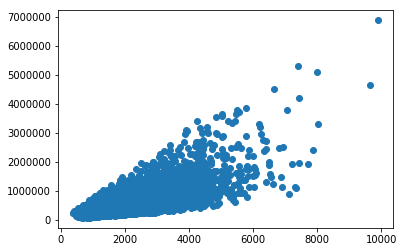

In [19]:
import matplotlib.pyplot as plt
plt.scatter(train_data['house_area'],train_data['sell_price'])
plt.show()

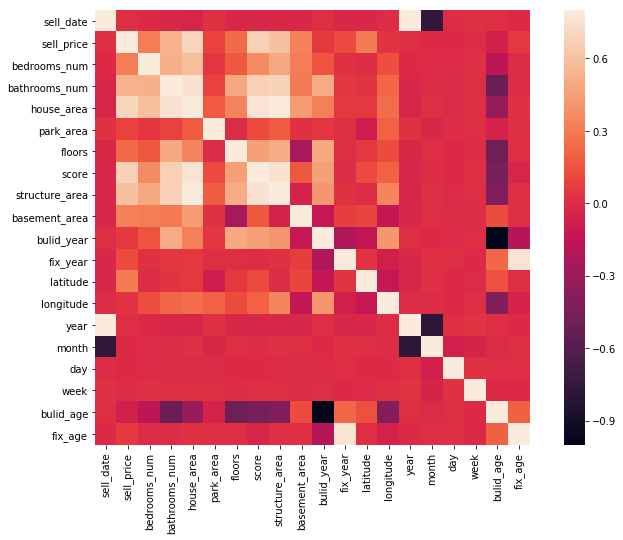

In [21]:
#correlation matrix
import seaborn as sns
corrmat = train_data.corr()
f, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(corrmat, vmax=0.8, square=True)

In [22]:
from keras.layers import Dense,Dropout,Activation,Input
from keras.models import Sequential,Model
from sklearn.model_selection import train_test_split
from keras import metrics
from keras.optimizers import SGD,Adam

Using TensorFlow backend.


In [37]:
def make_model(InputSize):
    model=Sequential()
    model.add(Dense(units=90,activation='relu',input_shape=(InputSize,)))
    model.add(Dropout(0.1))
    model.add(Dense(units=50,activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(units=1,activation=None))
    model.compile(loss='mean_squared_error',optimizer='adam',metrics=[metrics.mae])
    print(model.summary())
    return model

In [38]:
X_train,X_val,y_train,y_val=train_test_split(train_data[var],train_data['sell_price'].values,test_size=0.1,random_state=0)
model=make_model(18)
history = model.fit(X_train,y_train,batch_size=64,epochs=100,verbose=1,validation_data=(X_val,y_val),shuffle=True)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 90)                1710      
_________________________________________________________________
dropout_3 (Dropout)          (None, 90)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 50)                4550      
_________________________________________________________________
dropout_4 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 51        
Total params: 6,311
Trainable params: 6,311
Non-trainable params: 0
_________________________________________________________________
None
Train on 9000 samples, validate on 1000 samples
Epoch 1/100
9000/9000 [==============================] - 1s 88us/step - loss: 385058100

Epoch 37/100
9000/9000 [==============================] - 0s 46us/step - loss: 68478563461.8027 - mean_absolute_error: 171946.6480 - val_loss: 70323750567.9360 - val_mean_absolute_error: 167237.3440
Epoch 38/100
9000/9000 [==============================] - 0s 41us/step - loss: 67787298825.1022 - mean_absolute_error: 171590.0245 - val_loss: 70238031577.0880 - val_mean_absolute_error: 167092.8580
Epoch 39/100
9000/9000 [==============================] - 0s 41us/step - loss: 67679117981.9236 - mean_absolute_error: 172353.6777 - val_loss: 70833611358.2080 - val_mean_absolute_error: 166502.1888
Epoch 40/100
9000/9000 [==============================] - 0s 41us/step - loss: 68022379380.7360 - mean_absolute_error: 172159.8195 - val_loss: 70337902411.7760 - val_mean_absolute_error: 171812.5599
Epoch 41/100
9000/9000 [==============================] - 0s 39us/step - loss: 68508259989.7316 - mean_absolute_error: 173735.5311 - val_loss: 70432451837.9520 - val_mean_absolute_error: 166142.9901
Epoch

9000/9000 [==============================] - 0s 39us/step - loss: 62728878981.1200 - mean_absolute_error: 165812.2497 - val_loss: 65029084938.2400 - val_mean_absolute_error: 163018.4521
Epoch 79/100
9000/9000 [==============================] - 0s 38us/step - loss: 62795487561.5004 - mean_absolute_error: 165845.6400 - val_loss: 64556607062.0160 - val_mean_absolute_error: 157840.6205
Epoch 80/100
9000/9000 [==============================] - 0s 38us/step - loss: 62340793758.1511 - mean_absolute_error: 164494.1900 - val_loss: 64609564114.9440 - val_mean_absolute_error: 166154.5951
Epoch 81/100
9000/9000 [==============================] - 0s 45us/step - loss: 61922347348.4231 - mean_absolute_error: 163785.3828 - val_loss: 64547886186.4960 - val_mean_absolute_error: 162548.1073
Epoch 82/100
9000/9000 [==============================] - 0s 39us/step - loss: 61538923489.9627 - mean_absolute_error: 165176.0698 - val_loss: 64466047991.8080 - val_mean_absolute_error: 158924.0157
Epoch 83/100
9000/

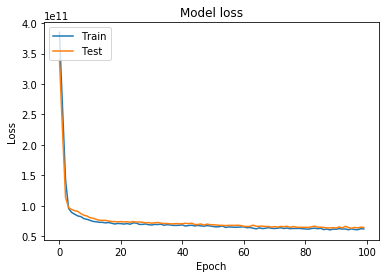

In [39]:
import matplotlib.pyplot as plt
# 绘制训练 & 验证的损失值
def plot_graph(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()
plot_graph(history)

In [41]:
model.save("data\\nn_model.yaml")

In [ ]:
from keras.models import load_model
for i in range(0,100):
    model = load_model("data\\nn_model.yaml")
    history = model.fit(X_train,y_train,batch_size=64,epochs=2000,verbose=1,validation_data=(X_val,y_val),shuffle=True)
    plot_graph(history)
    model.save("data\\nn_model.yaml")

Train on 9000 samples, validate on 1000 samples
Epoch 1/2000
9000/9000 [==============================] - 1s 72us/step - loss: 61552451782.4284 - mean_absolute_error: 163768.4617 - val_loss: 64961556660.2240 - val_mean_absolute_error: 158849.9488
Epoch 2/2000
9000/9000 [==============================] - 0s 38us/step - loss: 61834235842.1049 - mean_absolute_error: 164056.9653 - val_loss: 65187709321.2160 - val_mean_absolute_error: 157110.1118
Epoch 3/2000
9000/9000 [==============================] - 0s 38us/step - loss: 61262621707.8329 - mean_absolute_error: 162583.9628 - val_loss: 63012180017.1520 - val_mean_absolute_error: 156847.1850
Epoch 4/2000
9000/9000 [==============================] - 0s 38us/step - loss: 60803451296.8818 - mean_absolute_error: 163537.6461 - val_loss: 63286791798.7840 - val_mean_absolute_error: 157799.2338
Epoch 5/2000
9000/9000 [==============================] - 0s 40us/step - loss: 60737127197.3547 - mean_absolute_error: 162417.3697 - val_loss: 63902413078.5

Epoch 42/2000
9000/9000 [==============================] - 0s 47us/step - loss: 60594728519.4524 - mean_absolute_error: 161510.1416 - val_loss: 62506063216.6400 - val_mean_absolute_error: 154716.8670
Epoch 43/2000
9000/9000 [==============================] - 0s 44us/step - loss: 60467162892.0604 - mean_absolute_error: 161685.3323 - val_loss: 66538577952.7680 - val_mean_absolute_error: 159614.6222
Epoch 44/2000
9000/9000 [==============================] - 0s 40us/step - loss: 60749485572.0960 - mean_absolute_error: 161415.3251 - val_loss: 64966165512.1920 - val_mean_absolute_error: 155734.5876
Epoch 45/2000
9000/9000 [==============================] - 0s 39us/step - loss: 60422889413.7458 - mean_absolute_error: 161652.3694 - val_loss: 62352230694.9120 - val_mean_absolute_error: 155142.9036
Epoch 46/2000
9000/9000 [==============================] - 0s 39us/step - loss: 59341547540.0249 - mean_absolute_error: 160776.5438 - val_loss: 62646656860.1600 - val_mean_absolute_error: 153776.5731


Epoch 83/2000
9000/9000 [==============================] - 0s 37us/step - loss: 60859287936.1138 - mean_absolute_error: 161363.7777 - val_loss: 61589002928.1280 - val_mean_absolute_error: 153890.6960
Epoch 84/2000
9000/9000 [==============================] - 0s 38us/step - loss: 58783010928.8676 - mean_absolute_error: 159917.5481 - val_loss: 62045124427.7760 - val_mean_absolute_error: 152841.1084
Epoch 85/2000
9000/9000 [==============================] - 0s 39us/step - loss: 58897887810.9013 - mean_absolute_error: 159912.1734 - val_loss: 62075854487.5520 - val_mean_absolute_error: 156885.2994
Epoch 86/2000
9000/9000 [==============================] - 0s 46us/step - loss: 60779969868.2311 - mean_absolute_error: 160158.1448 - val_loss: 62042465370.1120 - val_mean_absolute_error: 158462.9374
Epoch 87/2000
4480/9000 [=============>................] - ETA: 0s - loss: 62947956297.1429 - mean_absolute_error: 162658.8549

In [48]:
model = load_model("data\\nn_model.yaml") 
pred=model.predict(test_data[var].values)
submissionFile=pd.DataFrame({'price':pred.reshape(1,-1)[0]})
submissionFile.to_csv("data\\submission.csv",index=False)